# Flight Price Prediction
## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#####  Size of training set: 10683 records

##### Size of test set: 2671 records

### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



#### Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects
# Loan Application Status Prediction
## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv
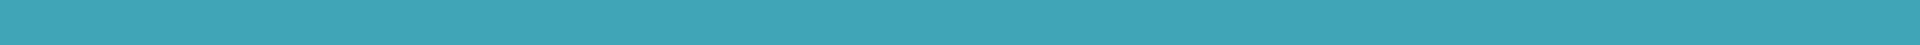

In [1]:
'''Importing Important libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''loading the dataset onto notebook'''
train_data = pd.read_excel(r"D:\Downloads\IDM Downloads\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
test_data = pd.read_excel(r"D:\Downloads\IDM Downloads\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
print(train_data.shape, test_data.shape)

(10683, 11) (2671, 10)


In [3]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In the given case study, we have to build a model to predict the price of the flights in India across various cities. We are given with a training data and a testing data. This case study is a type of regression problem, hence we will build the regression models.



# EXPLORATORY DATA ANALYSIS:
Starting with the EDA process to get various insights and clean the dataset for model building.
## Null Values:
First and foremost, looking at the null values if present in the dataset.

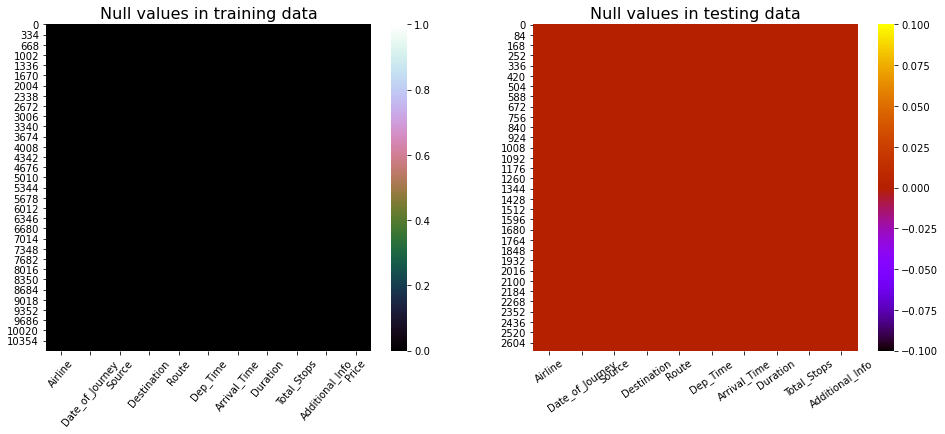

In [4]:
plt.figure(figsize = (16,6))
plt.subplot(1, 2, 1)
sns.heatmap(train_data.isnull(), cmap = 'cubehelix')
plt.xticks(rotation = 50)
plt.title("Null values in training data", fontsize = 16)

plt.subplot(1, 2, 2)
sns.heatmap(test_data.isnull(), cmap = 'gnuplot')
plt.xticks(rotation = 35)
plt.title("Null values in testing data", fontsize = 16)

plt.show()

From the heatmaps for the training and testing data, we see that the null values are not present in the dataset, but still some value may be present as the size is large, so we use the function to check the null values.

In [5]:
print(f"{train_data.isnull().sum()}\n\n{test_data.isnull().sum()}")

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


As we see that only one null values is present in the training data's columns 'Route' and 'Total_Stops'. We can remove that observation from the dataset.

In [6]:
# finding the observation with null value
train_data.loc[train_data['Route'].isnull() == True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.drop([9039], inplace = True)

Now that we have removed the null values fro the data, we look at the size of the data that we are working with and the data types of the features.

In [8]:
print(f"Size of training data: {len(train_data.index)} rows and {len(train_data.columns)} columns")
print(f"Size of testing data: {len(test_data.index)} rows and {len(test_data.columns)} columns")

Size of training data: 10682 rows and 11 columns
Size of testing data: 2671 rows and 10 columns


In [10]:
print(f"Datatypes of training data:\n{train_data.dtypes}\n")
print(f"Datatypes of testing data:\n{test_data.dtypes}")

Datatypes of training data:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Datatypes of testing data:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


We see that all the features are of object data type in the dataset, so we need to typecast them into suitable datatype. we will do this in coming steps.
## Feature Engineering and Encoding:
We move ahead with th feature engineering. Here we look at all the features one by one and draw insights from them. Also, the encoding will be done here. 

We start with plotting the scatter plots between different features and the Price, to see their effect on the price.

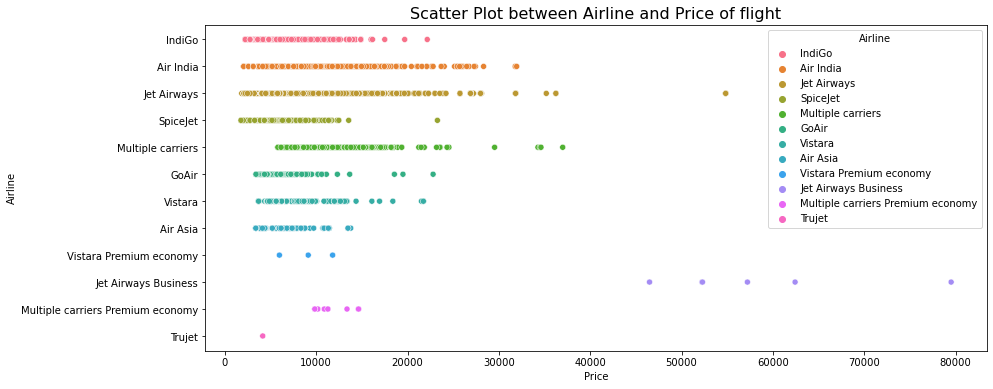

In [12]:
plt.figure(figsize = (14, 6))
plt.title("Scatter Plot between Airline and Price of flight", fontsize = 16)
sns.scatterplot(x = train_data['Price'], y = train_data['Airline'], hue = train_data['Airline'])
plt.show()

We see that the higest price of the flights is for Jet Airways Buisness Class Airline. Also we have different classes for each airline, we can make a feature specifying the different classes of the flight ticket namely Economy, Premium Economy and Business. We also check the values counts of each Airline in training and testing data.

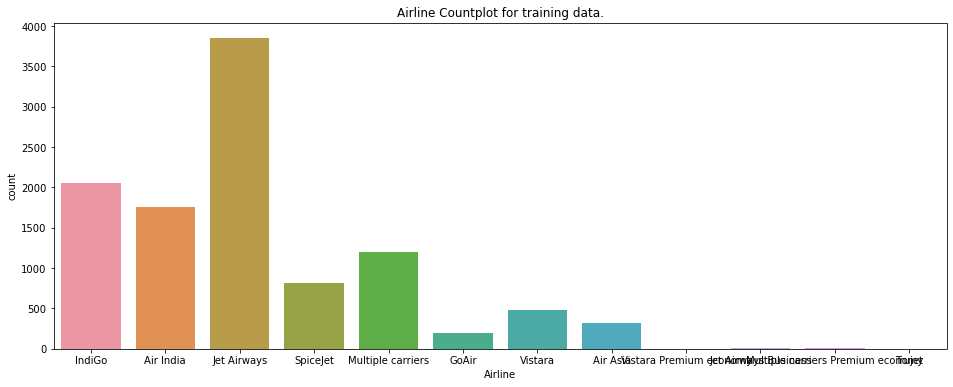

In [16]:
plt.figure(figsize=(16,6))
plt.title("Airline Countplot for training data.")
sns.countplot(x = train_data['Airline'])
plt.show()

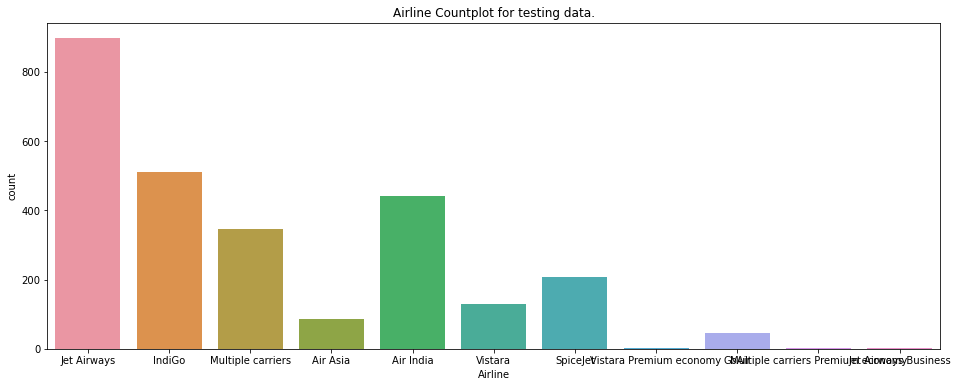

In [15]:
plt.figure(figsize=(16,6))
plt.title("Airline Countplot for testing data.")
sns.countplot(x = test_data['Airline'])
plt.show()

In [18]:
print(f"{train_data.Airline.value_counts()}\n\n{test_data.Airline.value_counts()}")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, d

For both training and  testing data, the hightest flights are booked for the Jet Airways Airline, whereas the lowest number of flights were booked for Vistara Premium Economy. We also see that the Trujet Airline had only one flight booked in training data, but, none of the flights wew booked for it in testing data, so we will remove the observation wit the Trujet Airline.

In [19]:
train_data.loc[train_data['Airline'] == 'Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


In [20]:
train_data.drop([2878], inplace = True)

**Making a new feature for flight ticket class**-

In [21]:
# creating new feature 'Booking_class'
Class = {'IndiGo': 'Economy', 'GoAir': 'Economy', 'Vistara': 'Economy', 'Vistara Premium economy': 'Premium Economy', 
         'Air Asia': 'Economy', 'Jet Airways': 'Economy', 'SpiceJet': 'Economy', 'Jet Airways Business': 'Business', 
         'Air India': 'Economy', 'Multiple carriers': 'Economy', 'Multiple carriers Premium economy': 'Premium Economy'}

train_data['Booking_Class'] = train_data['Airline'].map(Class)
test_data['Booking_Class'] = test_data['Airline'].map(Class)

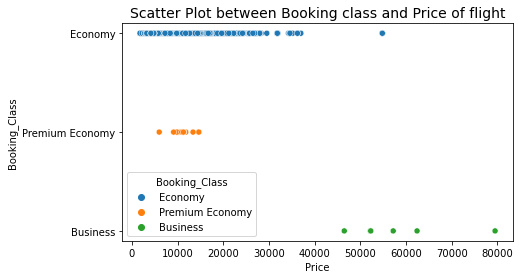

In [25]:
plt.figure(figsize = (7, 4))
plt.title("Scatter Plot between Booking class and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Booking_Class'], hue = train_data['Booking_Class'])
plt.show()

As expected, premium class has the higest price of the flight ticket. Hence, will encode the 'Booking_class' feature using ordinal encoding. Then we move ahead to next feature.

In [26]:
# encoding buisness class
class_enc = {'Economy' : 0, 'Premium Economy' : 1, 'Business': 3}

train_data['Booking_Class_enc'] = train_data['Booking_Class'].map(class_enc)
test_data['Booking_Class_enc'] = test_data['Booking_Class'].map(class_enc)

train_data.drop(['Booking_Class'], axis = 1, inplace = True)
test_data.drop(['Booking_Class'], axis = 1, inplace = True)

After the encoding of 'Booking_class' moving ahead with the 'Date_of_journey' column. We are given the dates between March to June of 2019 .We know that it is of the object data type. First, we convert it into the datetime data type, then we seperate it into the day and month on of the flight. We donot need the year as it is constant.

In [27]:
# converting to date-time
train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y')
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y')

# seperating the day and month for training data.
train_data['Journey_Date'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month

# seperating the day and month for testing data.
test_data['Journey_Date'] = test_data['Date_of_Journey'].dt.day
test_data['Journey_Month'] = test_data['Date_of_Journey'].dt.month

# dropping original column from data
train_data.drop(['Date_of_Journey'], axis = 1, inplace = True)
test_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

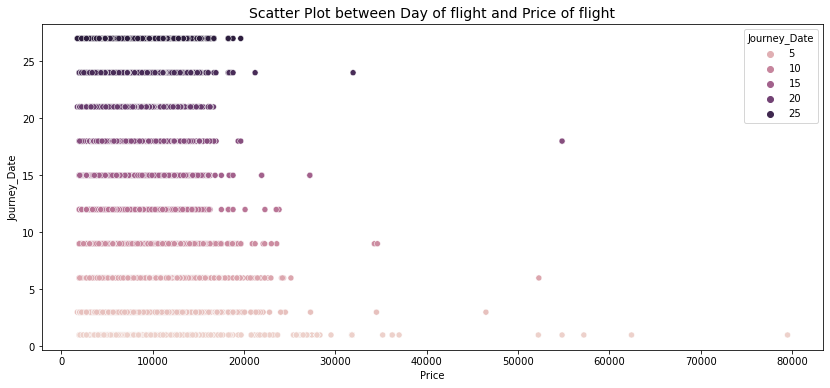

In [29]:
# between day and flight
plt.figure(figsize = (14, 6))
plt.title("Scatter Plot between Day of flight and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Journey_Date'], hue = train_data['Journey_Date'])
plt.show()

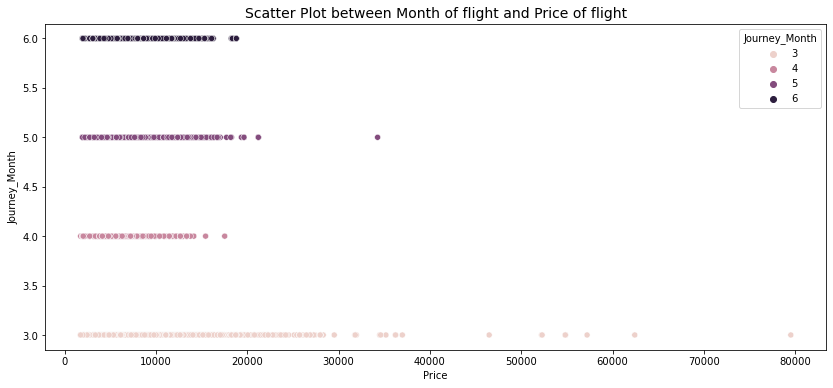

In [31]:
# between month and flight
plt.figure(figsize = (14, 6))
plt.title("Scatter Plot between Month of flight and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Journey_Month'], hue = train_data['Journey_Month'])
plt.show()

From the above scatter plots following insights can be drawn
- Price of the flight tickets is highest at the begining of the month an it decreases as we move ahead in the month
- Also, the price was the highest during the month of March and lowest in the April

Now, we have a look at the relation between source of the flight and the destination of the flight to the Prices of the tickets.

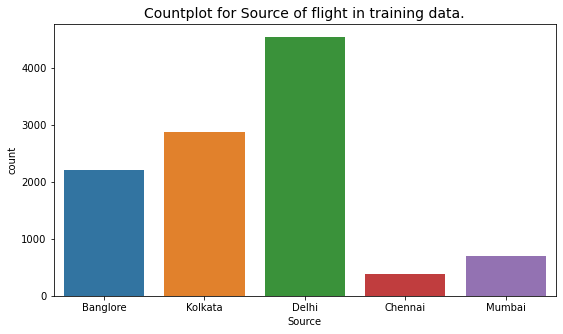

In [34]:
plt.figure(figsize=(9,5))
plt.title("Countplot for Source of flight in training data.", fontsize = 14)
sns.countplot(x = train_data['Source'])
plt.show()

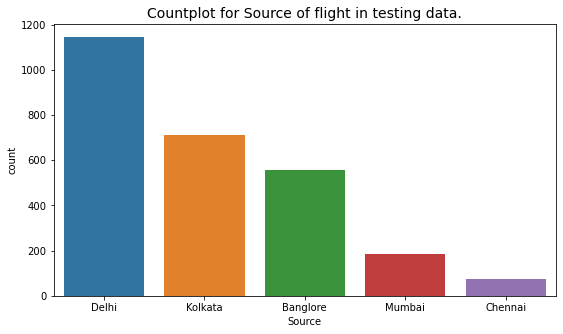

In [35]:
plt.figure(figsize=(9,5))
plt.title("Countplot for Source of flight in testing data.", fontsize = 14)
sns.countplot(x = test_data['Source'])
plt.show()

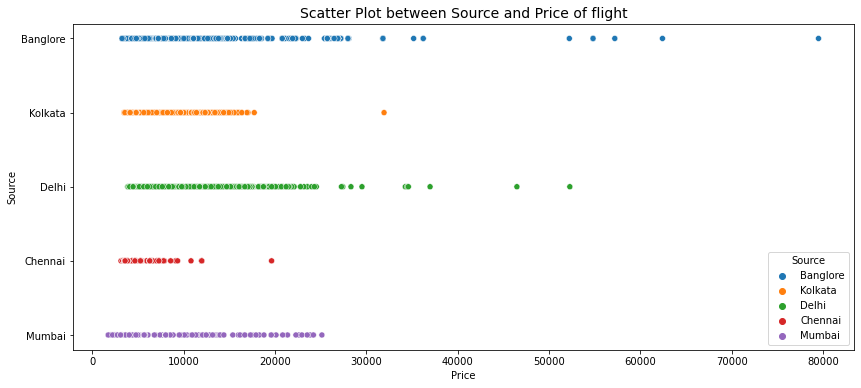

In [38]:
plt.figure(figsize = (14, 6))
plt.title("Scatter Plot between Source and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Source'], hue = train_data['Source'])
plt.show()

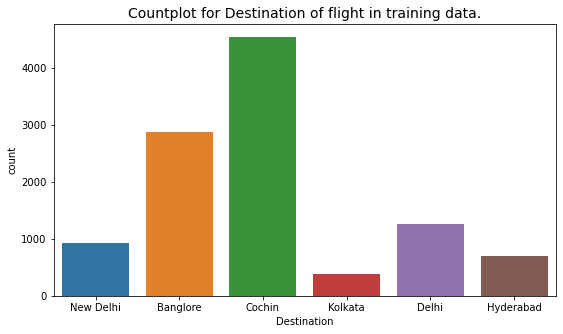

In [39]:
plt.figure(figsize=(9,5))
plt.title("Countplot for Destination of flight in training data.", fontsize = 14)
sns.countplot(x = train_data['Destination'])
plt.show()

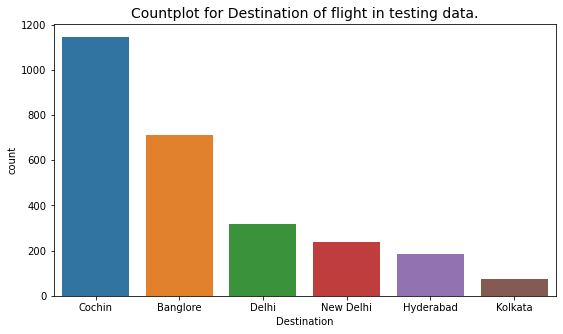

In [40]:
plt.figure(figsize=(9,5))
plt.title("Countplot for Destination of flight in testing data.", fontsize = 14)
sns.countplot(x = test_data['Destination'])
plt.show()

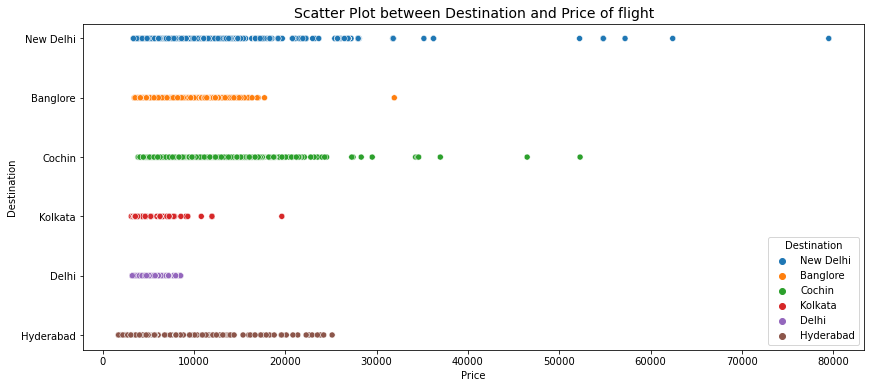

In [41]:
plt.figure(figsize = (14, 6))
plt.title("Scatter Plot between Destination and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Destination'], hue = train_data['Destination'])
plt.show()

From the above countplots nd scatter plots, we get following information-
1. **For Source of the flights**-
    - Most number of flights take off from Delhi for both training and testing data. Whereas the least number of flights take off from Chennai for both datasets.
    - Highest price of the tickets was for the flights that took off from Banglore, whereas the least price of ticket was for flights taking off from Chennai
2. **For Destination of the flights**-
    - Most number of flights landed in Cochin for both training and testing data. Whereas the least number of flights landed in Kolkata for both datasets.
    - Highest price of the tickets was for the flights that landed in New Delhi, whereas the least price of ticket was for flights landing in Chennai
    
Moving ahead to the Number of Stops of the flights, we first look at the prices according to the number of stops, then encode the 'Total_Stops' column.

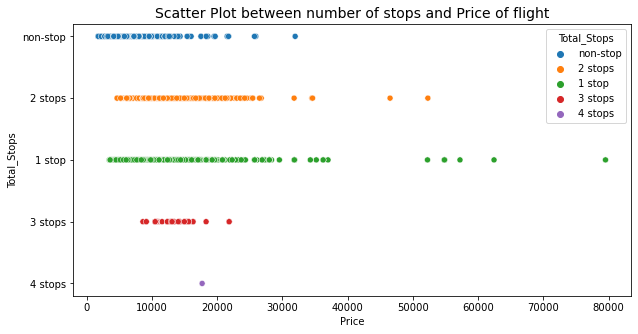

In [43]:
plt.figure(figsize = (10, 5))
plt.title("Scatter Plot between number of stops and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Total_Stops'], hue = train_data['Total_Stops'])
plt.show()

Flights with only 1 stop had the highest price of tickets

In [44]:
# ordinal encoding total stops
stops = {'1 stop' : 1, 'non-stop' : 0, '2 stops': 2, '3 stops': 3, '4 stops': 4}

train_data['Total_Stops'] = train_data['Total_Stops'].map(stops)
test_data['Total_Stops'] = test_data['Total_Stops'].map(stops)

The feature 'Duration' tells us about the total travelling time of the flight, and is given in form of object data type. We convert into the total minutes that the flight took to travel from the source to estination such that the encoding of this column is not necessary, and we have the necessary data from this feature.

In [45]:
import re

# defining an function to get hours from the 'Duration' column 
def get_hour(text):
    hours = re.findall(r"\d+h", str(text))
    if hours == []:
        return np.NaN
    else:
        return hours[0]

# Concatinating Hours in training data
train_data['Hours'] = train_data['Duration'].apply(get_hour)
train_data['Hours'] = train_data['Hours'].str.replace('h', '')
train_data['Hours'] = train_data['Hours'].astype(np.float64)
train_data['Hours'].fillna(0, inplace = True) 

# Concatinating Hours in testing data
test_data['Hours'] = test_data['Duration'].apply(get_hour)
test_data['Hours'] = test_data['Hours'].str.replace('h', '')
test_data['Hours'] = test_data['Hours'].astype(np.float64)
test_data['Hours'].fillna(0, inplace = True)

In [46]:
# defining an function to get minutes from the 'Duration' column
def get_minute(text):
    mins = re.findall(r"\d+m", str(text))
    if mins == []:
        return np.NaN
    else:
        return mins[0]

# Concatinating minutes in training data
train_data['Minutes'] = train_data['Duration'].apply(get_minute)
train_data['Minutes'] = train_data['Minutes'].str.replace('m', '')
train_data['Minutes'] = train_data['Minutes'].astype(np.float64)
train_data['Minutes'].fillna(0, inplace = True)

# Concatinating minutes in testing data
test_data['Minutes'] = test_data['Duration'].apply(get_minute)
test_data['Minutes'] = test_data['Minutes'].str.replace('m', '')
test_data['Minutes'] = test_data['Minutes'].astype(np.float64)
test_data['Minutes'].fillna(0, inplace = True)

In [47]:
# getting total duration for both datasets

train_data['Total_duration'] = (train_data['Hours'] * 60) + train_data['Minutes']
test_data['Total_duration'] = (test_data['Hours'] * 60) + test_data['Minutes']

In [48]:
train_data.drop(['Duration', 'Hours', 'Minutes'], axis = 1, inplace = True)
test_data.drop(['Duration', 'Hours', 'Minutes'], axis = 1, inplace = True)

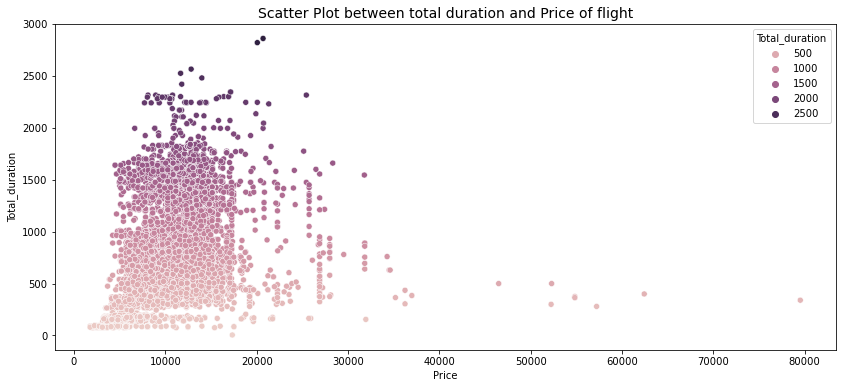

In [51]:
plt.figure(figsize = (14, 6))
plt.title("Scatter Plot between total duration and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Total_duration'], hue = train_data['Total_duration'])
plt.show()

**The highest prices of tickets are for the flights where the duration of flight is less.**

We are also given the departure time and the arrival time of the flights. These time can be categorised into Morning, Afternoon, Evening and Night so that it can be analysed better and encoded. we will do the same for the departure and arrival time.

In [52]:
# function to categorise the time
def get_time(text):
    text = text.split(':')
    text = int(text[0])
    if (text >= 6 and text < 12):
        return 'Morning'
    elif (text >= 12 and text < 17):
        return 'Noon'
    elif (text >= 17 and text < 20):
        return 'Evening'
    else:
        return 'Night'
    
# applying the function for the departure time in training and testing datasets.
train_data['Dep_time_of_day'] = train_data['Dep_Time'].apply(get_time)   
test_data['Dep_time_of_day'] = test_data['Dep_Time'].apply(get_time) 

# applying the function for the arrival time in training and testing datasets.
train_data['Arr_time_of_day'] = train_data['Arrival_Time'].apply(get_time)   
test_data['Arr_time_of_day'] = test_data['Arrival_Time'].apply(get_time)

In [53]:
train_data.drop(['Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)
test_data.drop(['Dep_Time', 'Arrival_Time'], axis = 1, inplace = True)

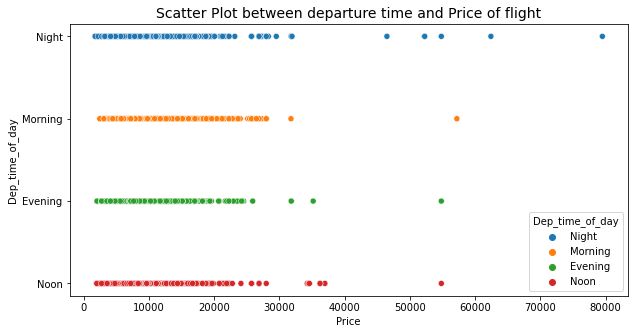

In [54]:
plt.figure(figsize = (10, 5))
plt.title("Scatter Plot between departure time and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Dep_time_of_day'], hue = train_data['Dep_time_of_day'])
plt.show()

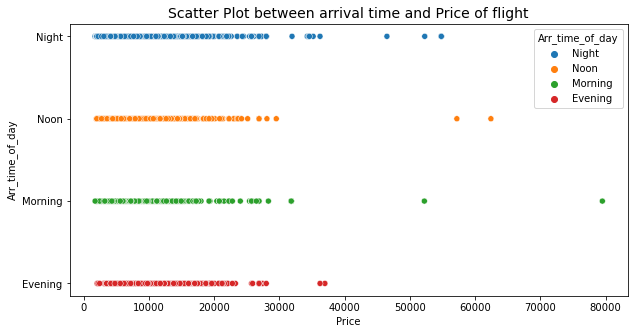

In [55]:
plt.figure(figsize = (10, 5))
plt.title("Scatter Plot between arrival time and Price of flight", fontsize = 14)
sns.scatterplot(x = train_data['Price'], y = train_data['Arr_time_of_day'], hue = train_data['Arr_time_of_day'])
plt.show()

Moving ahead to the route of the flight, we look at the total number of routes that are present for the training and testing data. After that , we clean the string data in the 'Route' feature so that it can be encoded.

In [56]:
print(f"Total routes for flights in training dataset are {train_data.Route.nunique()}")
print(f"Total routes for flights in testing dataset are {test_data.Route.nunique()}")

Total routes for flights in training dataset are 127
Total routes for flights in testing dataset are 100


In [57]:
# cleaning 'Route' in training dataset
train_data['Route'] = train_data['Route'].str.replace(' →', '')
train_data['Route'] = train_data['Route'].str.replace(' ', '_')

# cleaning 'Route' in testing dataset
test_data['Route'] = test_data['Route'].str.replace(' →', '')
test_data['Route'] = test_data['Route'].str.replace(' ', '_')

from sklearn.preprocessing import OrdinalEncoder

# encoding the 'Route' feature
oe = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=127)
oe.fit(train_data[['Route']])
train_route_enc = oe.transform(train_data[['Route']])
test_route_enc = oe.transform(test_data[['Route']])

train_data['Route_enc'] = train_route_enc
test_data['Route_enc'] = test_route_enc

In [58]:
train_data.drop(['Route'], axis = 1, inplace = True)
test_data.drop(['Route'], axis = 1, inplace = True)

Similarly, we encode the 'Additional_info' feature.

In [59]:
oe = OrdinalEncoder()
oe.fit(train_data[['Additional_Info']])
train_add_enc = oe.transform(train_data[['Additional_Info']])
test_add_enc = oe.transform(test_data[['Additional_Info']])

train_data['Additional_Info_enc'] = train_add_enc
test_data['Additional_Info_enc'] = test_add_enc

In [60]:
train_data.drop(['Additional_Info'], axis = 1, inplace = True)
test_data.drop(['Additional_Info'], axis = 1, inplace = True)

In [61]:
# looking at the dataset
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Booking_Class_enc,Journey_Date,Journey_Month,Total_duration,Dep_time_of_day,Arr_time_of_day,Route_enc,Additional_Info_enc
0,IndiGo,Banglore,New Delhi,0,3897,0,24,3,170.0,Night,Night,18.0,8.0
1,Air India,Kolkata,Banglore,2,7662,0,1,5,445.0,Night,Noon,83.0,8.0
2,Jet Airways,Delhi,Cochin,2,13882,0,9,6,1140.0,Morning,Night,117.0,8.0
3,IndiGo,Kolkata,Banglore,1,6218,0,12,5,325.0,Evening,Night,90.0,8.0
4,IndiGo,Banglore,New Delhi,1,13302,0,1,3,285.0,Noon,Night,29.0,8.0


We encode the remaning data using the one-hot encoding.

In [62]:
train_data = pd.get_dummies(train_data, columns=['Airline', 'Source', 'Destination', 'Dep_time_of_day', 'Arr_time_of_day'])

test_data = pd.get_dummies(test_data, columns=['Airline', 'Source', 'Destination', 'Dep_time_of_day', 'Arr_time_of_day'])

In [63]:
train_data['price'] = train_data['Price']
train_data.drop(['Price'], axis = 1, inplace = True)

 We take the log of price and total duration as they are the only contionous data.

In [64]:
train_data['price'] = np.log1p(train_data['price'])

train_data['Total_duration'] = np.log1p(train_data['Total_duration'])
test_data['Total_duration'] = np.log1p(test_data['Total_duration'])

We have feature engineered and encoded all the data. We can look at the correlation between all the faetures and the target variable.

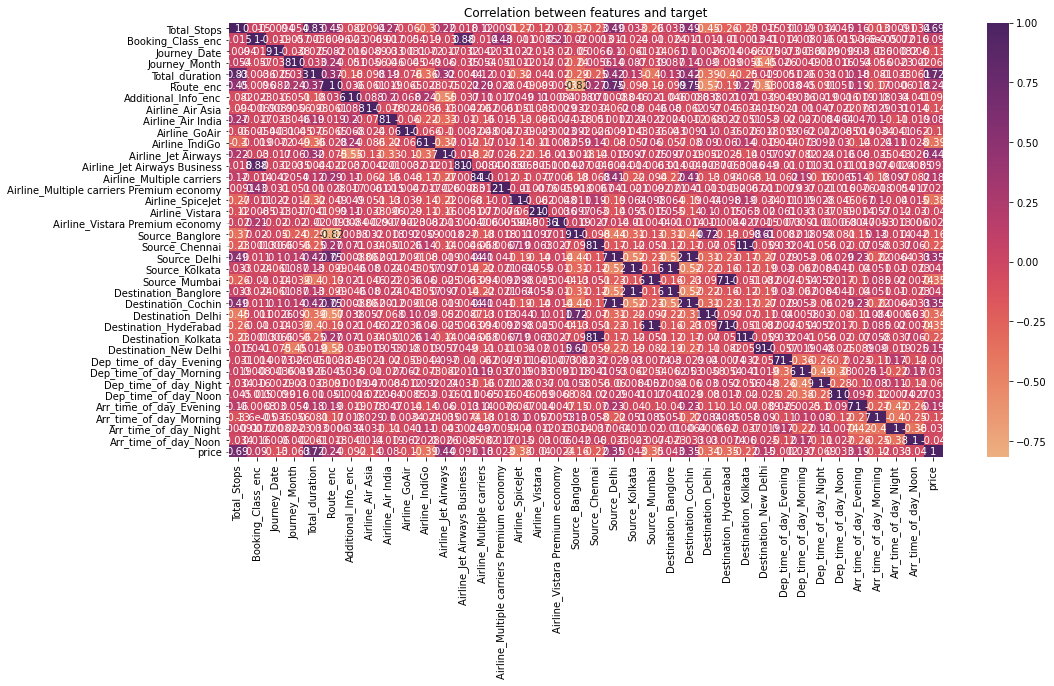

In [65]:
plt.figure(figsize = (16,8))
plt.title("Correlation between features and target")
sns.heatmap(train_data.corr(), annot = True, cmap = 'flare')

plt.show()

As we see that not much can be seen from the Correlation heatmap, so we will look at the relation using the correlation matrix.

In [66]:
pd.set_option('display.max_rows', None)
corr_mat = train_data.corr()
corr_mat.iloc[:,-1]

Total_Stops                                  0.690714
Booking_Class_enc                            0.090492
Journey_Date                                -0.126235
Journey_Month                               -0.062537
Total_duration                               0.724452
Route_enc                                    0.242240
Additional_Info_enc                         -0.091775
Airline_Air Asia                            -0.141713
Airline_Air India                            0.079953
Airline_GoAir                               -0.102783
Airline_IndiGo                              -0.388960
Airline_Jet Airways                          0.444148
Airline_Jet Airways Business                 0.090940
Airline_Multiple carriers                    0.176391
Airline_Multiple carriers Premium economy    0.023390
Airline_SpiceJet                            -0.384221
Airline_Vistara                             -0.039528
Airline_Vistara Premium economy              0.002401
Source_Banglore             

From the above correlation matrix, we get the information that the target variable is positively correlated to 'Total_duration', 'Total_Stops', 'Airline_Jet Airways', 'Source_Delhi' features. It is negatively correlated to 'Airline_IndiGo', 'Destination_Hyderabad', 'Source_Mumbai', 'Airline_SpiceJet' features.


# MODEL BUILDING:
Now, we have got the cleaned and encoded dataset. We will proceed further with building our Regression model.
### Random State Selection-
Selecting the best possible random state for spliting of the data.

In [67]:
from sklearn.linear_model import LinearRegression # selecting linear regression as model(any model can be selected)
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

max_accuracy = 0 # maximum accuracy
best_rs = 0 # best random state
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(train_data.loc[:,'Total_Stops':'Arr_time_of_day_Noon'], 
                                                        train_data.loc[:,'price'], test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy}")

Best Random State is 39, 0.7795054782853029


From the above function, best possible random state to give best performance is 39. Using it to split the data

In [68]:
x_train, x_test, y_train, y_test = train_test_split(train_data.loc[:,'Total_Stops':'Arr_time_of_day_Noon'], 
                                                        train_data.loc[:,'price'], test_size = 0.30, random_state = 39)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7476, 37) (3205, 37) (7476,) (3205,)


### Model Selection-
The models used for the case study which will be fitted and evaluated are Linear Regression, Lasso Regression, Ridge Regression, KNeighbors Regressor, SVR, Decision Tree Regressor, Gradient Boosting Regressor, Random Forest Regressor

In [69]:
'''importing the models'''
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print("Accuracy Score of Linear Regression model is", r2_score(y_test, pred_lr)*100)

ls = Lasso()
ls.fit(x_train, y_train)
pred_ls = ls.predict(x_test)
print("Accuracy Score of Lasso Regression model is", r2_score(y_test, pred_ls)*100)

rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
print("Accuracy Score of Ridge Regression model is", r2_score(y_test, pred_rd)*100)

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)
print("Accuracy Score of KNeighbors Regressor model is", r2_score(y_test, pred_knr)*100)

svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
print("Accuracy Score of SVR model is", r2_score(y_test, pred_svr)*100)

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
print("Accuracy Score of Decision Tree Regressor model is", r2_score(y_test, pred_dtr)*100)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
print("Accuracy Score of Gradient Boosting Regressor model is", r2_score(y_test, pred_gbr)*100)

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
print("Accuracy Score of Random Forest Regressor model is", r2_score(y_test, pred_rfr)*100)

Accuracy Score of Linear Regression model is 77.95054782853029
Accuracy Score of Lasso Regression model is 5.833246226207677
Accuracy Score of Ridge Regression model is 77.93996568419229
Accuracy Score of KNeighbors Regressor model is 82.84827317153567
Accuracy Score of SVR model is 71.62467718554356
Accuracy Score of Decision Tree Regressor model is 90.591666398494
Accuracy Score of Gradient Boosting Regressor model is 87.71282783041923
Accuracy Score of Random Forest Regressor model is 93.695283051161


### Model Cross Validation-
Out of all the fitted models, the Random Forest Regressor gave the best accuracy score of 93.69%. But this can be a result of overfitting. So we cross validate all the models to see their mean accuracy scores.

In [72]:
x = train_data.loc[:,'Total_Stops':'Arr_time_of_day_Noon']
y = train_data.loc[:,'price']

In [73]:
from sklearn.model_selection import cross_val_score
# Using the cv value = 10

lr_scores = cross_val_score(lr, x, y, scoring='r2', cv = 10) # cross validating the model
print(lr_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Linear Regression is {lr_scores.mean()*100}\n")

ls_scores = cross_val_score(ls, x, y, scoring='r2', cv = 10)
print(ls_scores)
print(f"Mean of accuracy scores is for Lasso Regression is {ls_scores.mean()*100}\n")

rd_scores = cross_val_score(rd, x, y, scoring='r2', cv = 10)
print(rd_scores)
print(f"Mean of accuracy scores is for Ridge Regression is {rd_scores.mean()*100}\n")

knr_scores = cross_val_score(knr, x, y, scoring='r2', cv = 10)
print(knr_scores)
print(f"Mean of accuracy scores is for KNeighbors Regressor is {knr_scores.mean()*100}\n")

svr_scores = cross_val_score(svr, x, y, scoring='r2', cv = 10)
print(svr_scores)
print(f"Mean of accuracy scores is for SVR is {svr_scores.mean()*100}\n")

dtr_scores = cross_val_score(dtr, x, y, scoring='r2', cv = 10)
print(dtr_scores)
print(f"Mean of accuracy scores is for Decision Tree Regressor is {dtr_scores.mean()*100}\n")

gbr_scores = cross_val_score(gbr, x, y, scoring='r2', cv = 10)
print(gbr_scores)
print(f"Mean of accuracy scores is for Gradient Boosting Regressor is {gbr_scores.mean()*100}\n")

rfr_scores = cross_val_score(rfr, x, y, scoring = 'r2', cv = 10)
print(rfr_scores)
print(f"Mean of accuracy scores is for Random Forest Regressor is {rfr_scores.mean()*100}\n")

[0.76009503 0.76819167 0.76294901 0.78373914 0.75919695 0.7487863
 0.75425816 0.72714387 0.76656859 0.77830917]
Mean of accuracy scores is for Linear Regression is 76.09237876179813

[0.04680738 0.03941929 0.05325219 0.08183425 0.06809984 0.03918595
 0.07331848 0.05191555 0.04789725 0.04916361]
Mean of accuracy scores is for Lasso Regression is 5.508937996448797

[0.7603099  0.76816119 0.76266555 0.78376908 0.75917408 0.74874751
 0.75452283 0.72724336 0.76645702 0.77830778]
Mean of accuracy scores is for Ridge Regression is 76.09358298248307

[0.83845965 0.8436099  0.84377722 0.84626263 0.83669165 0.84261606
 0.80811209 0.82042556 0.83044882 0.80818363]
Mean of accuracy scores is for KNeighbors Regressor is 83.18587212412216

[0.72566003 0.73036959 0.72622771 0.74715114 0.73245743 0.71799116
 0.70203912 0.69647585 0.72942842 0.70820707]
Mean of accuracy scores is for SVR is 72.16007518626314

[0.88338368 0.90791497 0.9170607  0.91009075 0.91364293 0.91385692
 0.88663125 0.89544364 0.91

In [74]:
# finding the difference between accuracy score and mean accuracies given after cross validation.
lis3 = ['Linear Regression','Lasso Regression','Ridge Regression','KNeighbors Regressor','SVR','Decision Tree Regressor',
        'Gradient Boosting Regressor','Random Forest Regressor']

lis1 = [r2_score(y_test, pred_lr)*100, r2_score(y_test, pred_ls)*100, r2_score(y_test, pred_rd)*100, 
        r2_score(y_test, pred_knr)*100, r2_score(y_test, pred_svr)*100, r2_score(y_test, pred_dtr)*100,
        r2_score(y_test, pred_gbr)*100, r2_score(y_test, pred_rfr)*100]

lis2 = [lr_scores.mean()*100, ls_scores.mean()*100, rd_scores.mean()*100, knr_scores.mean()*100, svr_scores.mean()*100, 
        dtr_scores.mean()*100, gbr_scores.mean()*100, rfr_scores.mean()*100]

for i in range(0, 8):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Linear Regression 1.8581690667321595
Lasso Regression 0.32430822975888063
Ridge Regression 1.8463827017092171
KNeighbors Regressor -0.33759895258648953
SVR -0.5353980007195815
Decision Tree Regressor 0.26288837961348577
Gradient Boosting Regressor 0.43165597160928826
Random Forest Regressor -0.2292469513621569


The least difference is given by KNeighbours Regressor and the best scores are given by Random Forest Regressor after the cross validation. So, we will tune both of these models and compare their performance during evaluation.

### HYPERPARAMETER TUNING:
We tune both of the selected models.

In [75]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
param = dict() # making a parameter dictionary
param['criterion'] = ['mse', 'mae']
param['max_features'] = ['auto', 'sqrt', 'log2']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]

# Tuning Random Forest Regressor
gs = GridSearchCV(estimator = rfr, param_grid = param, scoring='neg_mean_absolute_error', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-0.07847289216998925
{'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [76]:
# Fitting above parameters into the model
rf = RandomForestRegressor(criterion = 'mse', max_features = 'auto', min_samples_split = 2, n_estimators= 100)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

In [78]:
knr = KNeighborsRegressor()
param = dict()
param['leaf_size'] = list(range(1,50))
param['n_neighbors'] = list(range(1,30))

# Tuning KNN Regressor
gs = GridSearchCV(estimator = knr, param_grid = param, scoring='neg_mean_absolute_error', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-0.14205018306395306
{'leaf_size': 1, 'n_neighbors': 3}


In [79]:
# Fitting above parameters into the model
knr = KNeighborsRegressor(leaf_size= 1, n_neighbors= 3)
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)

# MODEL EVALUATION:
We have built the best models after their cross validation and tuning. It is now time to evaluate the models performance using the evaluation metrics. 

In [80]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

First evaluation of RFR using the metrics.

In [81]:
plt.style.use('ggplot')

Accuracy Score of Random Forest Regressor model is 93.78277721347777
The mean absolute error of the fitted model is 0.07356816628238594
The mean squared error of the fitted model is 0.01664296813883572
The root mean squared error of the fitted model is 0.12900762821955808


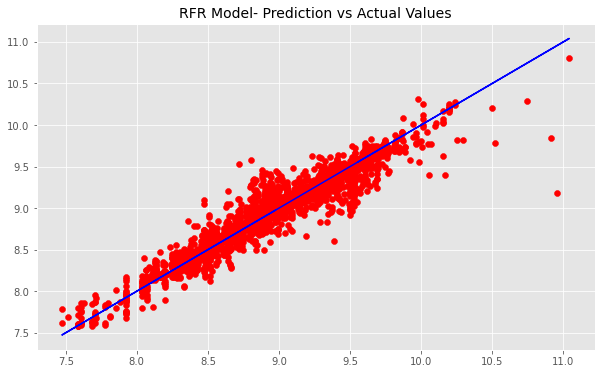

In [82]:
print("Accuracy Score of Random Forest Regressor model is", r2_score(y_test, pred_rf)*100)
print("The mean absolute error of the fitted model is", mae(y_test, pred_rf))
print("The mean squared error of the fitted model is", mse(y_test, pred_rf))
print("The root mean squared error of the fitted model is", np.sqrt(mse(y_test, pred_rf)))

plt.figure(figsize = (10,6))
plt.title("RFR Model- Prediction vs Actual Values", fontsize = 14)
plt.scatter(x = y_test, y = pred_rf, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.show()

Now, evaluation of KNN Model with metrics

Accuracy Score of KNeighbour Regressor model is 83.29238893214588
The mean absolute error of the fitted model is 0.14017229553348193
The mean squared error of the fitted model is 0.04472483104210871
The root mean squared error of the fitted model is 0.21148246036517712


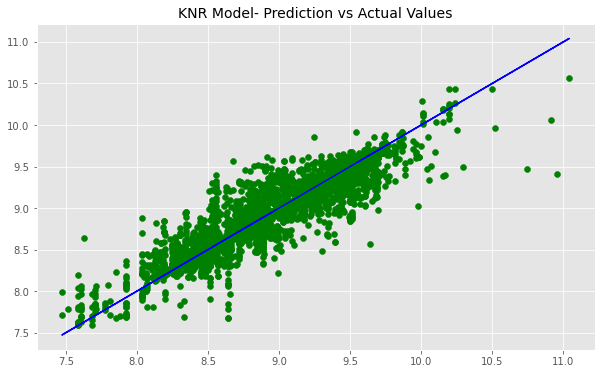

In [83]:
print("Accuracy Score of KNeighbour Regressor model is", r2_score(y_test, pred_knr)*100)
print("The mean absolute error of the fitted model is", mae(y_test, pred_knr))
print("The mean squared error of the fitted model is", mse(y_test, pred_knr))
print("The root mean squared error of the fitted model is", np.sqrt(mse(y_test, pred_knr)))

plt.figure(figsize = (10,6))
plt.title("KNR Model- Prediction vs Actual Values", fontsize = 14)
plt.scatter(x = y_test, y = pred_knr, color = 'g')
plt.plot(y_test, y_test, color = 'b')
plt.show()

After the evaluation of both the models, we see that the random forest regressor model is given a better performance for the case study. Hence it is used for the prediction on the testing data.
![](https://www.theeagleinn.com/wp-content/uploads/2017/11/stacked_page_divider_image-1378934968-tapestry-d.png)

# Flight Price Prediction:
We use the fitted random forest regressor model to make the final predictions.

In [84]:
# Categorising data
X_train = train_data.loc[:,'Total_Stops':'Arr_time_of_day_Noon']
Y_train = train_data.loc[:,'price']
X_test = test_data

# Making Predictions using model
rfr = RandomForestRegressor(criterion = 'mse', max_features = 'auto', min_samples_split = 2, n_estimators= 100)
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

In [85]:
# transforming predicted values by taking log inverse.
Y_pred = np.exp(Y_pred)
Y_pred

array([14715.        ,  4236.38865462, 12899.        , ...,
       15675.80750628, 14791.1230585 ,  7590.72428879])

# Saving the Predictions:
Finally, after the prediction is made, saving the prices in the xlsx format.

In [86]:
ans_sub = pd.DataFrame(data=Y_pred, columns=['Predicted Price'])
writer = pd.ExcelWriter('Flight Price Prediction.xlsx', engine='xlsxwriter')
ans_sub.to_excel(writer,sheet_name='Flight Prices', index=False)
writer.save()